In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ipython_memwatcher import MemWatcher
mw = MemWatcher()
mw.start_watching_memory()

In [2] used 0.227 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 43.121 MiB


In [3]:
from ideal_point.all import all_

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3] used 82.449 MiB RAM in 4.583s, peaked 0.000 MiB above current, total RAM usage 125.570 MiB


In [7]:
legislator_df, bill_df, sponsor_df, vote_df, position_df = all_()



In [7] used 141.402 MiB RAM in 7.803s, peaked 41.855 MiB above current, total RAM usage 708.297 MiB


### Visualize Points

We can do a quick gut chuck of our legislator ideal points to make sure they seperate democrats and republicans

In [24]:
from altair import *

In [24] used 0.000 MiB RAM in 0.412s, peaked 0.000 MiB above current, total RAM usage 847.500 MiB


In [25] used 0.000 MiB RAM in 0.064s, peaked 0.000 MiB above current, total RAM usage 847.500 MiB


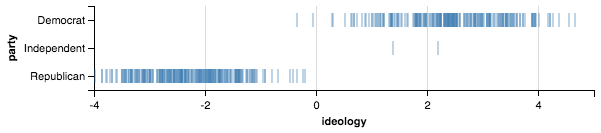

In [25]:
Chart(legislator_df[["ideology", "party"]]).mark_tick().encode(
    x='ideology:Q',
    y='party:O',
)

In [37]:
l_labels = pd.Series([
    "Ted Cruz",
    "Bernie Sanders",
    "John Boehner",
    "Harry Reid"
], index=[
    446,
    12,
    12346,  
    286
])

In [37] used 0.000 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 847.562 MiB


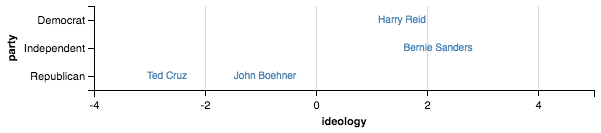

In [39] used 0.012 MiB RAM in 0.121s, peaked 0.000 MiB above current, total RAM usage 847.738 MiB


In [39]:
Chart(legislator_df.assign(leg=l_labels)).mark_text().encode(
    x='ideology:Q',
    y='party',
    text='leg',
)

### Validation

Some of the most conservative members in our model include Mike Pompeo, who lead the house inquiry into Benghazi, and Randy Weber, who drew fire for a tweet declaring Barack Obama a "socialist dictator."

Some of the most liberal members include Jim McGovern, who represents the pioneer valley and Jerrold Nadler, who represents Manhattan's upper west side. The most liberal legislator, Jan Schakowsky, is a longtime critic of the Iraq war.

The house bills to remove voted on by all democrats are close to the democratic ideology.

In [22]:
# pd.set_option('display.max_columns', 999)
# pd.set_option('display.max_colwidth', 200)
# vote_pt_df[vote_pt_df["question"].str.contains("Immigration", na=False)]
# vote_pt_df[vote_pt_df["number"] == 168]

In [22] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 1197.691 MiB


In [26]:
import pandas as pd

In [26] used 0.000 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 847.500 MiB


In [27]:
labels = pd.Series([
    "Violence Against Women Reauthorization Act of 2013",
    "Border Security, Economic Opportunity, and Immigration Modernization Act",
    "Keystone XL Pipeline Approval Act",
    "Consolidated Appropriations Act, 2014"
], index=[
    500,
    717,
    76,  
    570
])

In [27] used 0.000 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 847.500 MiB


In [29]:
chart_df = vote_df[["ideology", "bias"]].assign(bill=labels).dropna()

In [29] used 0.000 MiB RAM in 0.008s, peaked 0.000 MiB above current, total RAM usage 847.500 MiB


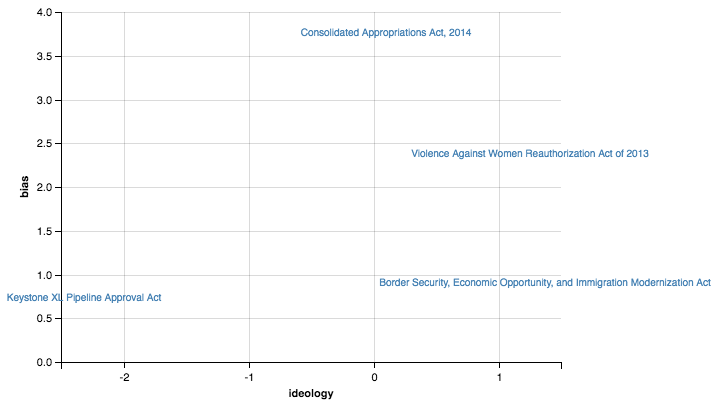

In [30] used 0.000 MiB RAM in 0.025s, peaked 0.000 MiB above current, total RAM usage 847.500 MiB


In [30]:
Chart(chart_df).mark_text().encode(
    x='ideology:Q',
    y='bias:Q',
    text='bill',
)

In [ ]:
Chart(vote_pt_df[["ideology", "bias"]].dropna()).mark_circle().encode(
    x='ideology:Q',
    y='bias:Q',)

This is to get bills linked w/ duplication data for now

## Text reuse

In [ ]:
# vote_pt_df.to_csv("vote_pt_df.csv")
# run wtfpandasjoin.py to do the join. i kept trying to do w/ pandas and getting errors/bugs

In [17]:
import pandas as pd
import math
reuse_df = pd.DataFrame.from_csv("pairs_enhanced_again.txt")
# many, many, many unknowns b.c no votes. research opportunity. ideal point w/o vote. interesting... b/c many
# things are killed in committee. 
criterion = reuse_df['ideology_a'].map(lambda x: x != "unknown") 
reuse_df_no_unk = reuse_df[criterion]
reuse_df_no_unk['ideology_a'] = reuse_df_no_unk['ideology_a'].astype(float)
reuse_df_no_unk['ideology_a'] = reuse_df_no_unk['ideology_b'].astype(float)
reuse_df_no_unk['ideology_eq'] = reuse_df_no_unk.apply(lambda x:x["ideology_a"] == x["ideology_b"], axis=1)
reuse_df_no_unk = reuse_df_no_unk[reuse_df_no_unk['ideology_eq'] == False]

/Library/Python/2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


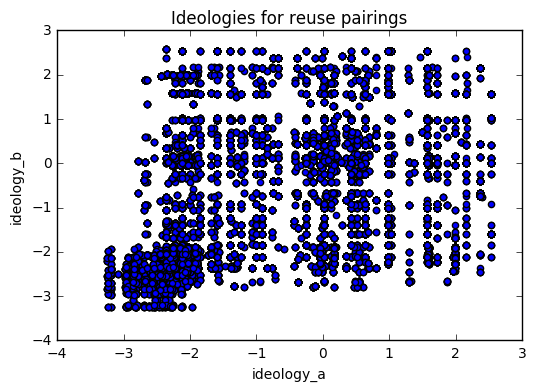

In [55]:
%matplotlib inline
# http://stackoverflow.com/questions/14300137/making-matplotlib-scatter-plots-from-dataframes-in-pythons-pandas
import matplotlib.pylab as plt

reuse_df_no_unk.plot(kind='scatter', x='ideology_a', y='ideology_b', title="Ideologies for reuse pairings")

#### Bipartisanship?

It appears that a liberal section 

In [ ]:
import pandas as pd
import math
reuse_df = pd.DataFrame.from_csv("pairs_enhanced_again.txt")
# many, many, many unknowns b.c no votes. research opportunity. ideal point w/o vote. interesting... b/c many
# things are killed in committee. 
criterion = reuse_df['ideology_a'].map(lambda x: x != "unknown") 
reuse_df_no_unk = reuse_df[criterion]
reuse_df_no_unk["sa"] = reuse_df_no_unk["ideology_a"].astype(float)> 0
reuse_df_no_unk["sb"] = reuse_df_no_unk["ideology_b"].astype(float)> 0
reuse_df_no_unk["diff"] = reuse_df_no_unk["sa"] == reuse_df_no_unk["sb"]
c2 = reuse_df_no_unk["diff"].map(lambda x: x == False) 
reuse_df_no_unk = reuse_df_no_unk[c2]
reuse_df_no_unk.shape